In [87]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple

In [ ]:
class FaceDetector:
    def __init__(self):
        self.cascade_classifier: cv2.CascadeClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.landmark_model = cv2.face.createFacemarkLBF()
        self.landmark_model.loadModel("lbfmodel.yaml")

    def detect(self, img_path: str) -> Tuple[np.ndarray, List[np.ndarray], List[Tuple[int, int]], List[np.ndarray]]:
        img_read = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_bgr = cv2.cvtColor(img_read, cv2.COLOR_GRAY2BGR)

        face_rectangles = self.cascade_classifier.detectMultiScale(img_bgr, scaleFactor=1.1, minNeighbors=5)
        face_centers: List[Tuple[int, int]] = []

        for (x, y, width, height) in face_rectangles:
            cv2.rectangle(img_bgr, (x, y), (x + width, y + height), (0, 255, 0), 2)

            center_x, center_y = x + (width // 2), y + (height // 2)
            cv2.circle(img_bgr, (center_x, center_y), 3, (0, 0, 255), -1)

            face_centers.append((center_x, center_y))

        _, landmarks_all_faces = self.landmark_model.fit(img_read, face_rectangles)

        landmarks_all_faces = [landmarks[0] for landmarks in landmarks_all_faces]

        for landmarks_face in landmarks_all_faces:
            for (x, y) in landmarks_face:
                cv2.circle(img_bgr, (int(x), int(y)), 1, (255, 0, 0), -1)

        return img_bgr, list(face_rectangles), face_centers, landmarks_all_faces
    
    def mask_points(self, img_path: str, landmarks: List[np.ndarray]) -> Tuple[np.ndarray, List[np.ndarray]]:
        img_read = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_bgr = cv2.cvtColor(img_read, cv2.COLOR_GRAY2BGR)

        idxs = [18, 25, 48, 54, 36, 45, 51]

        selected_pts: List[List[Tuple[int, int]]] = []
        for lm in landmarks:
            face_pts = []
            for i in idxs:
                x, y = lm[i]
                face_pts.append((int(x), int(y)))
                cv2.circle(img_bgr, (int(x), int(y)), 3, (0,255,255), -1)
            selected_pts.append(face_pts)

        return img_bgr, selected_pts

    def display(self, bgr_img: np.ndarray) -> None:
        img_rgb = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()


In [89]:
face_detector = FaceDetector()

In [90]:
img, rects, cents, landmarks = face_detector.detect("test_images/faces.jpg")

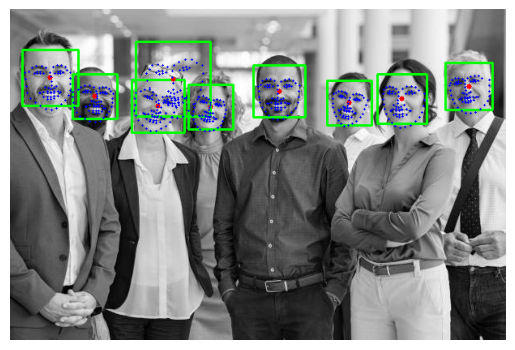

In [91]:
face_detector.display(img)

In [92]:
image_mask_pts, pts = face_detector.mask_points("test_images/faces.jpg", landmarks)

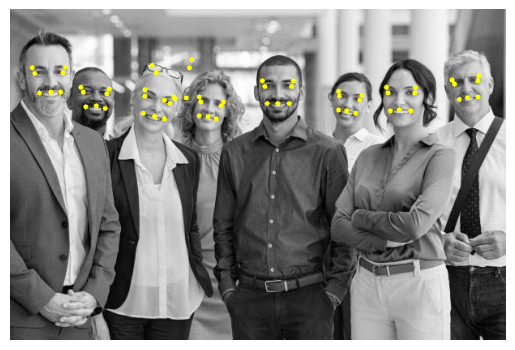

In [93]:
face_detector.display(image_mask_pts)